# Tarea 4:

## Clasificador Bayesiano Ingenuo

Realizar clasificación usando un clasificadore bayesiano ingenuo (Naive Bayes), sobre los datos del archivo `seeds_dataset.csv`, que se encuentra en el directorio de datos del repositorio. La columna objetivo es `clase`

Fecha de entrega: martes 16 de Julio (antes de la hora de clase)

### Información sobre el conjuto de datos

Los nombres de los atributos son:

- area: área A,
- perimetro: perímetro P,
- compacidad: compacidad C = 4piA/P^2,
- largo_grano: longitud del grano,
- ancho_grano: ancho del grano,
- coeficiente_asimetría: coeficiente de asimetría
- largo_surco: longitud del surco del grano.
- clase: Tipo de semillas [Kama, rosa, canadiense](En el mismo orden)

### Importar las librerías a utilizar

In [35]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Leer el conjunto de datos

In [47]:
semillas = pd.read_csv("../../datos/seeds_dataset.csv")
semillas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimetro              210 non-null    float64
 2   compacidad             210 non-null    float64
 3   largo_grano            210 non-null    float64
 4   ancho_grano            210 non-null    float64
 5   coeficiente_asimetria  210 non-null    float64
 6   largo_surco            210 non-null    float64
 7   clase                  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


### Separar los atributos y el objetivo. Recuerde que el objetivo es la columna `clase`

In [37]:
kama = semillas['clase'][semillas['clase'] == 1].count()
rosa = semillas['clase'][semillas['clase'] == 2].count()
canadiense = semillas['clase'][semillas['clase'] == 3].count()

total_clases = semillas.shape[0];

print(f'Probabilidad kama: {kama/total_clases}, rosa: {rosa/total_clases}, canadiense: {canadiense/total_clases}')

Probabilidad kama: 0.3333333333333333, rosa: 0.3333333333333333, canadiense: 0.3333333333333333


### Genere un diagrama `pairplot` para visualizar la relación entre todos los atributos.

D:\aprendizaje-automatico\lib-anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\aprendizaje-automatico\lib-anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\aprendizaje-automatico\lib-anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\aprendizaje-automatico\lib-anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

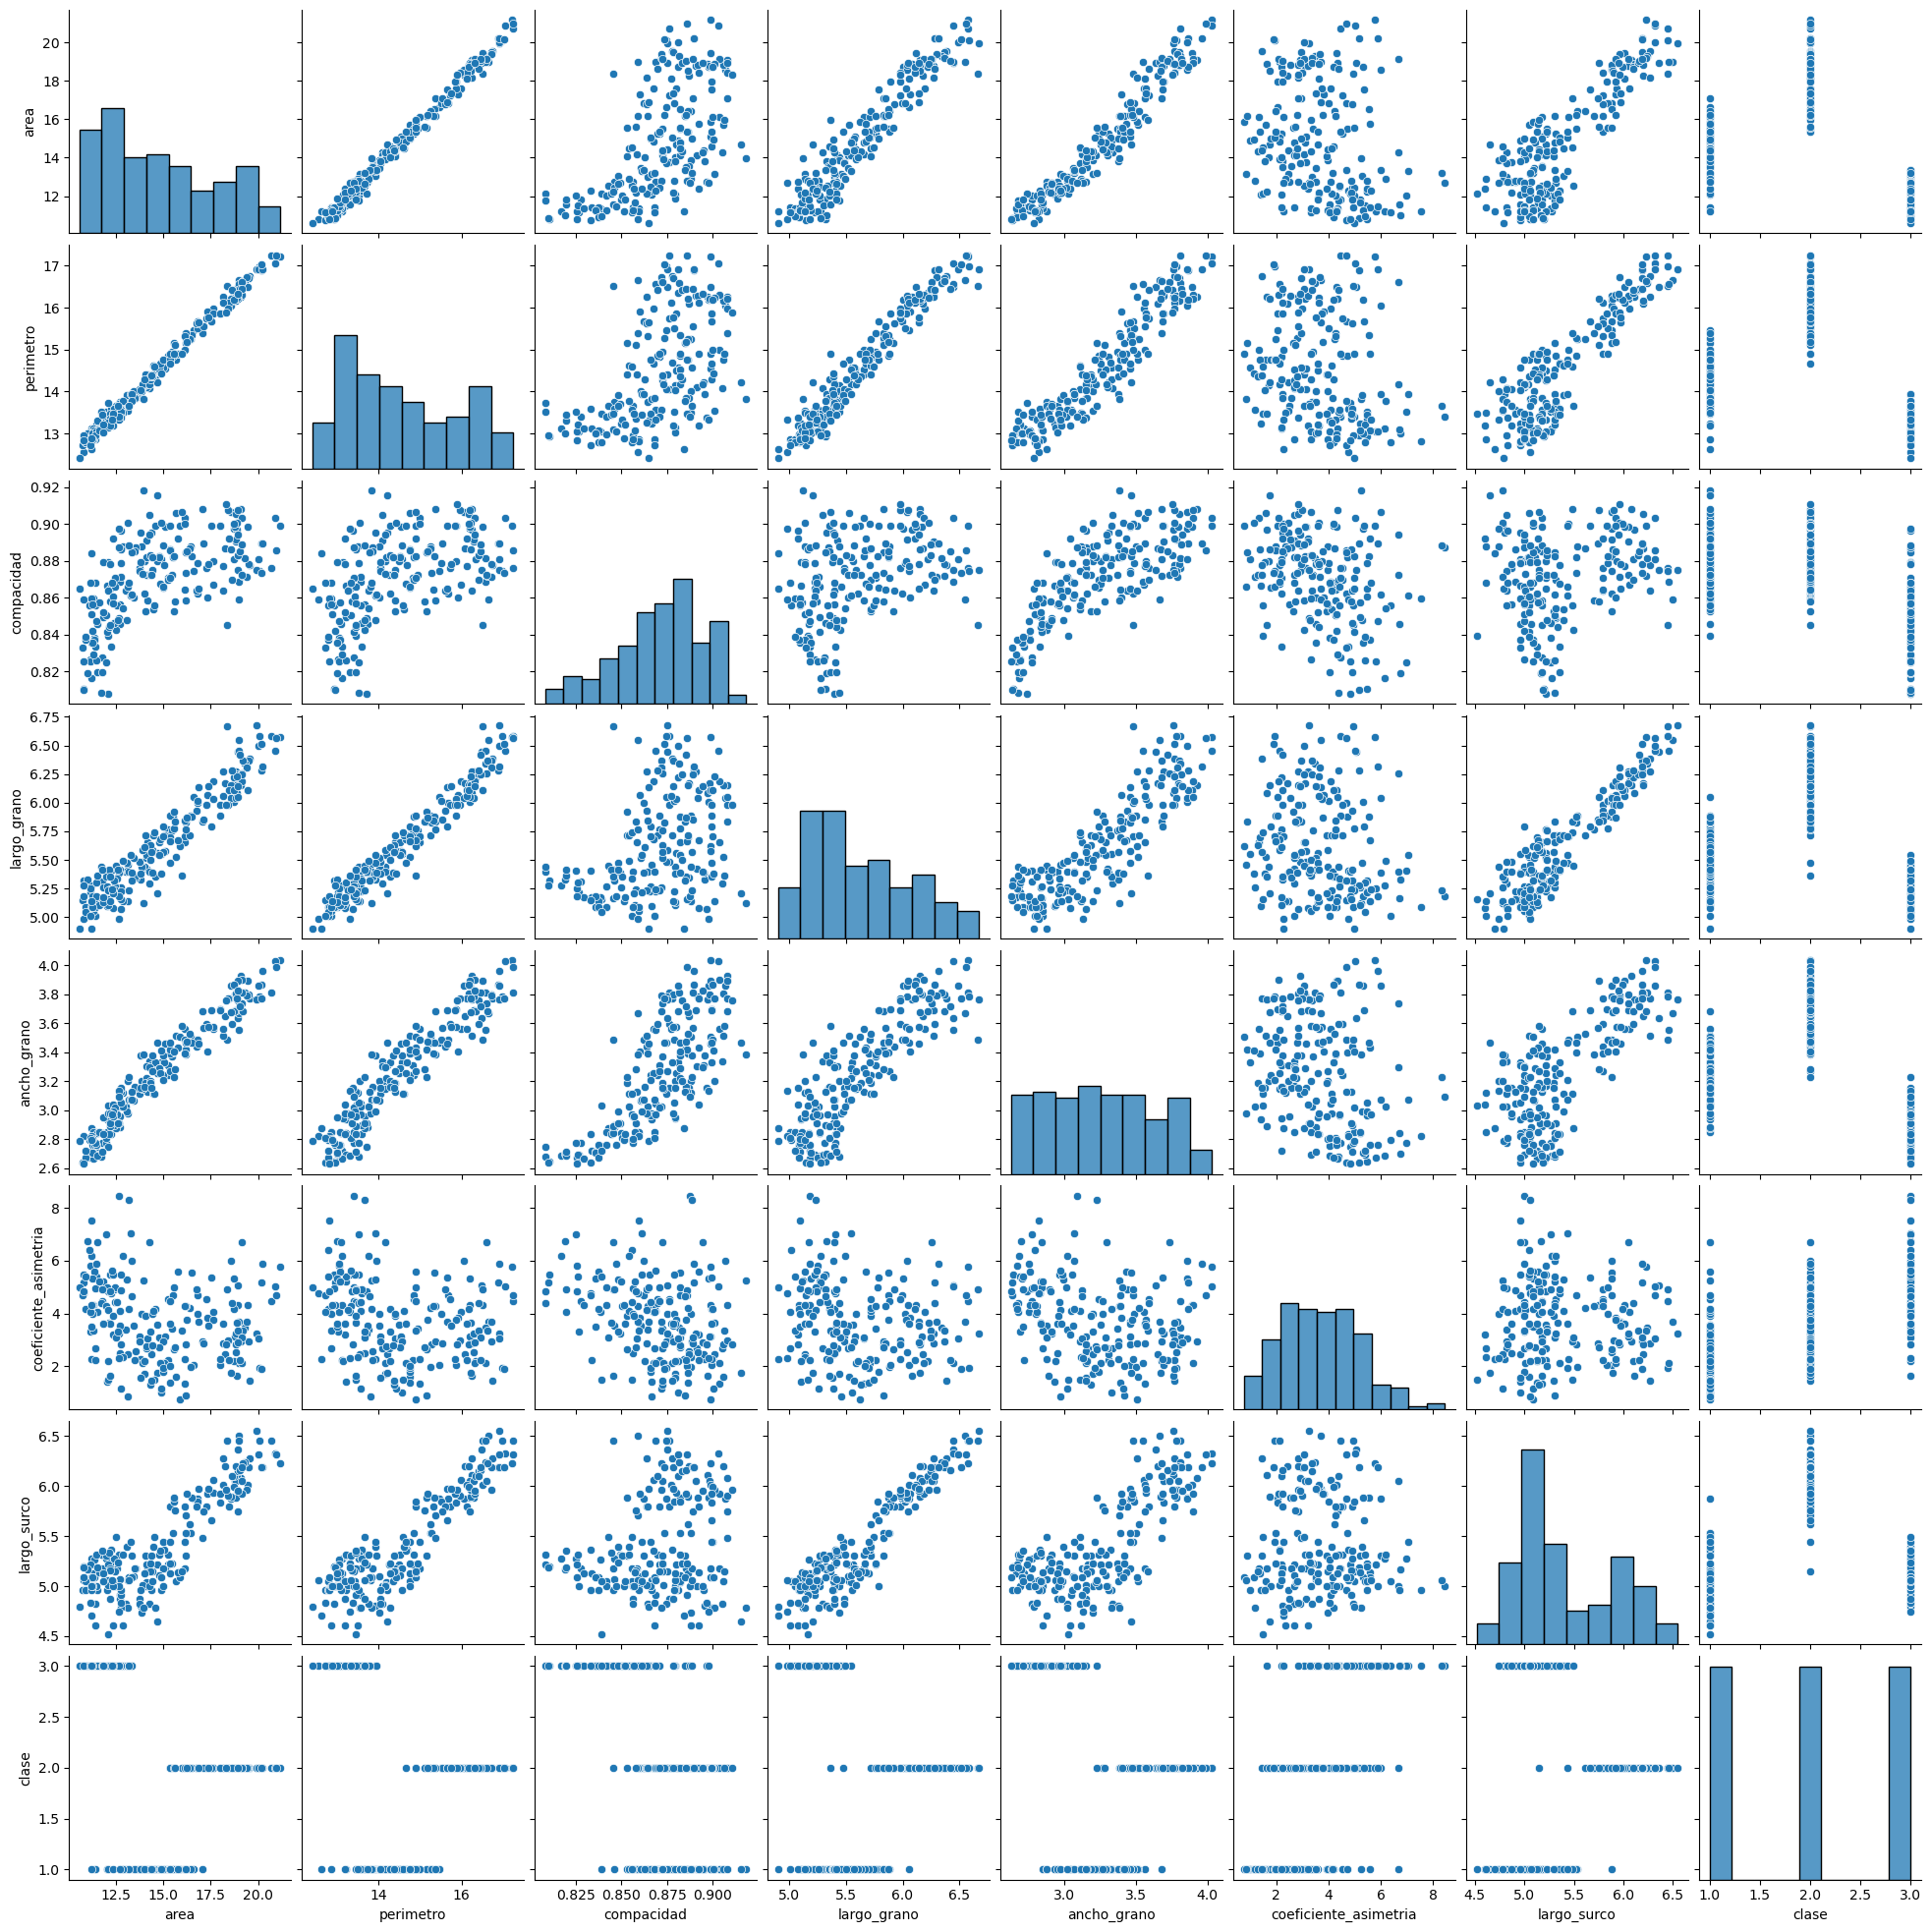

In [38]:
sns.pairplot(data=semillas);

### Elija sólo dos atributos, `compacidad` y `largo_surco`. Para realizar la clasificación.

In [39]:
X_subconjunto = semillas[['compacidad','largo_surco']]

### Genere un diagrama `pairplot` para visualizar la relación entre estos atributos.

D:\aprendizaje-automatico\lib-anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\aprendizaje-automatico\lib-anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


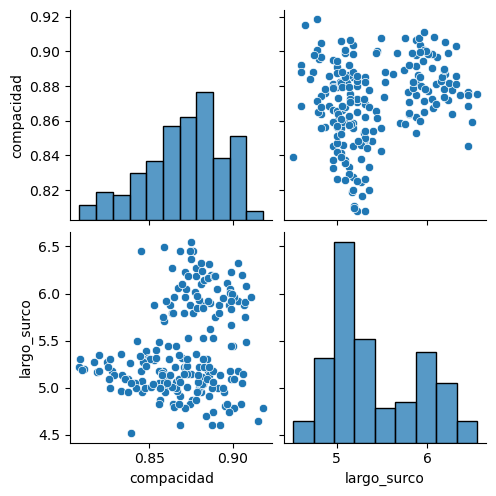

In [40]:
sns.pairplot(data=X_subconjunto);

### Dividir el conjunto de datos en uno de entrenamiento y uno de prueba. Fijar el tamaño del conjunto de prueba en 30% y la semilla del generador de números aleatorios en 18.

In [43]:
entrenamiento_x, prueba_x , entrenamiento_y, prueba_y  = train_test_split(X_subconjunto, semillas.clase, train_size=0.7, test_size=0.3, random_state=18)
forma_entrenamiento = entrenamiento_x
forma_prueba = prueba_x
print(f"entrenamiento: {forma_entrenamiento}")
print(f"prueba: {forma_prueba}")

entrenamiento:      compacidad  largo_surco
201      0.8977        4.745
65       0.8879        4.607
175      0.8590        5.063
109      0.8865        5.894
62       0.8923        4.605
..          ...          ...
190      0.8390        5.045
69       0.8458        5.067
120      0.8897        6.188
19       0.8686        4.914
42       0.9009        4.783

[147 rows x 2 columns]
prueba:      compacidad  largo_surco
56       0.8818        5.044
180      0.8560        4.825
125      0.8999        5.992
49       0.8676        5.351
165      0.8793        5.056
..          ...          ...
91       0.8984        6.053
57       0.9006        5.088
45       0.8794        4.961
34       0.8779        5.360
1        0.8811        4.956

[63 rows x 2 columns]


### Instanciar el modelo GaussianNB y entrenarlo con los datos de entrenamiento

In [44]:
naiveBayes = GaussianNB()
naiveBayes.fit(entrenamiento_x, entrenamiento_y)

GaussianNB()

### Generar las predicciones sobre el conjunto de prueba

In [45]:
predicciones = naiveBayes.predict(prueba_x)
exactitud = naiveBayes.score(prueba_x, prueba_y)

print("Predicciones conjunto de prueba:\n {}".format(predicciones))
print(f'La exactitus es: {exactitud}')

Predicciones conjunto de prueba:
 [1 1 2 1 1 3 1 2 3 2 1 3 1 1 2 1 1 2 3 1 1 2 2 2 3 3 3 1 2 1 2 3 1 2 3 3 1
 2 3 3 2 1 3 1 1 3 2 1 3 2 2 1 1 3 3 3 1 3 2 1 1 1 1]
La exactitus es: 0.873015873015873


### Realizar la clasificación pero ahora usando todos los atributos

### Calcular la exactitud del modelo sobre los datos de prueba

In [ ]:
# Crear las celdas necesarias para realizar la clasificación con todos los atributos

In [48]:
all_attributes = semillas[['compacidad','largo_surco', 'area', 'perimetro', 'largo_grano', 'ancho_grano', 'coeficiente_asimetria']]

In [51]:
entrenamiento_x_delta, prueba_x_delta , entrenamiento_y_delta, prueba_y_delta  = train_test_split(all_attributes, semillas.clase, train_size=0.7, test_size=0.3, random_state=18)
forma_entrenamiento_delta = entrenamiento_x_delta
forma_prueba_delta = prueba_x_delta
print(f"entrenamiento: {forma_entrenamiento_delta}")
print(f"prueba: {forma_prueba_delta}")

entrenamiento:      compacidad  largo_surco   area  perimetro  largo_grano  ancho_grano  \
201      0.8977        4.745  12.67      13.32        4.984        3.135   
65       0.8879        4.607  12.88      13.50        5.139        3.119   
175      0.8590        5.063  10.80      12.57        4.981        2.821   
109      0.8865        5.894  18.55      16.22        6.153        3.674   
62       0.8923        4.605  12.36      13.19        5.076        3.042   
..          ...          ...    ...        ...          ...          ...   
190      0.8390        5.045  10.93      12.80        5.046        2.717   
69       0.8458        5.067  12.73      13.75        5.412        2.882   
120      0.8897        6.188  20.24      16.91        6.315        3.962   
19       0.8686        4.914  12.72      13.57        5.226        3.049   
42       0.9009        4.783  13.16      13.55        5.138        3.201   

     coeficiente_asimetria  
201                  2.300  
65            

In [52]:
naiveBayes = GaussianNB()
naiveBayes.fit(entrenamiento_x_delta, entrenamiento_y_delta)

GaussianNB()

In [53]:
predicciones_delta = naiveBayes.predict(prueba_x_delta)
exactitud_delta = naiveBayes.score(prueba_x_delta, prueba_y_delta)

print("Predicciones conjunto de prueba:\n {}".format(predicciones_))
print(f'La exactitus es: {exactitud}') 

Predicciones conjunto de prueba:
 [1 3 2 1 3 3 1 2 3 2 1 3 1 1 2 1 1 2 3 1 1 2 2 2 3 3 3 1 2 1 2 3 1 2 1 3 1
 2 3 3 2 3 3 1 1 1 2 1 3 2 2 1 1 3 1 3 3 3 2 1 1 1 1]
La exactitus es: 0.9841269841269841
